# Pearson coefficient 

3. Given a matrix with $n$ rows and $m$ columns (e.g., the first 4 rows
from the `iris` dataset), compute the correlation matrix, i.e.,
an $m\times m$ matrix $\mathbf{C}$ with $c_{i,j}$ denoting
the Pearson coefficient for the $i$-th and the $j$-th column.

given by:
$$
r(\mathbf{x},\mathbf{y}) =  \frac{1}{n-1} \sum_{i=1}^n
   \frac{x_i - \bar{x}}{s_{x}}
\,
   \frac{y_i - \bar{y}}{s_{y}}.
$$

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')

In [5]:
A = np.array(iris.iloc[:, :4])
A.shape

(150, 4)

In [17]:
A_center = A - np.mean(A, axis=0) # centering
A_normalized = A_center/np.sqrt(np.sum(A_center**2, axis=0))
A_normalized.T @ A_normalized # dot product

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

4c2 = 6 unique correlation coef values above the diagonal those are interesting

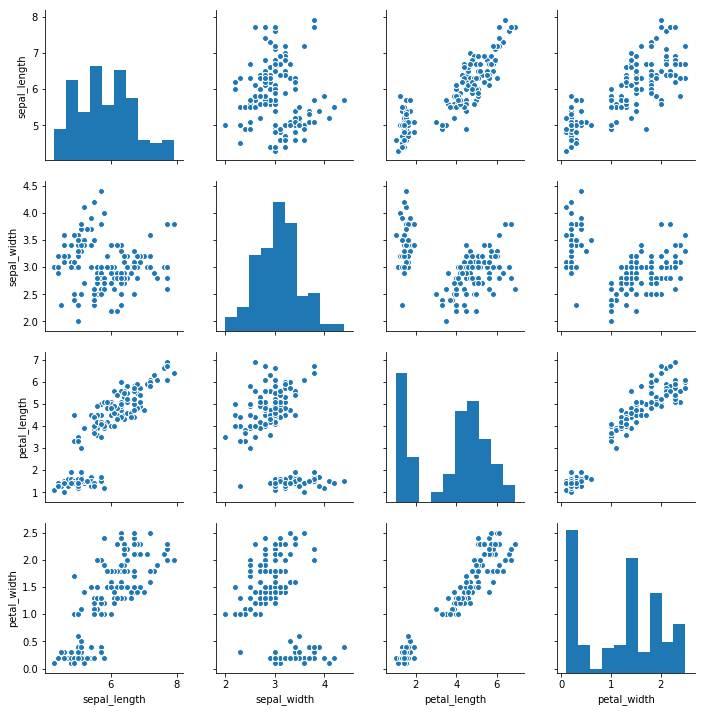

In [178]:
sns.pairplot(iris.iloc[:,:4])

# Spearman rank correlation coefficient

2. Let `x` and `y` be two vectors of the same length, $n$.
Compute [the Spearman rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient),
given by:
$$
\varrho(\mathbf{x},\mathbf{y})
=
1-\frac{6 \sum_{i=1}^n d_i^2}{n (n^2-1)},
$$
where $d_i=R(\mathbf{x})_i-R(\mathbf{y})_i$, $i=1,\dots,n$,
and $R(\mathbf{x})_i$ denotes the rank of $x_i$ in `x`.

In [20]:
import scipy.stats

In [22]:
scipy.stats.rankdata([22.5, 20.0, 19.5, 25.25, 30.5])

array([3., 2., 1., 4., 5.])

In [24]:
scipy.stats.rankdata([22.5, 20.0, 19.5, 25.25, 30.5, 22.5])

array([3.5, 2. , 1. , 5. , 6. , 3.5])

In [30]:
len([])

0

In [86]:
def spearman(x, y):
    return 1-(6*np.sum((scipy.stats.rankdata(x) - scipy.stats.rankdata(y))**2))/ (len(x)*((len(x)**2)-1))

In [91]:
spearman([1,2,3], [1,4,9])

1.0

In [109]:
print(spearman([1,2,3], [9,4,1]))
print(spearman([1,2,3,6], [71,2,46,12]))
x = np.random.rand(100)
spearman(x, 2*x-1), spearman(x, -2*x-1), spearman( np.random.rand(100),  np.random.rand(100))

-1.0
-0.3999999999999999


(1.0, -1.0, -0.03857185718571854)

In [120]:
spearman(x, 2*np.exp(x))

1.0

In [122]:
def pearson(x,y):
    return np.sum(
        (x-np.mean(x))/np.std(x, ddof=1) * (y-np.mean(y))/np.std(y, ddof=1)
    )/ (len(x)-1)
pearson(x, 2*np.exp(10*x))

0.7320495311879109

In [119]:
# also compute spearman's rho between all vars in A
n = A.shape[1]
result = np.empty((4,4))
for i in np.arange(n):
    for j in np.arange(n):
        result[i,j] = spearman(A[:,i], A[:,j])
        
print(result)

[[ 1.         -0.16076003  0.88213076  0.83524157]
 [-0.16076003  1.         -0.30268456 -0.27726832]
 [ 0.88213076 -0.30268456  1.          0.93803013]
 [ 0.83524157 -0.27726832  0.93803013  1.        ]]


# Relational & Comparison ops

In [126]:
A = np.c_[1:4, 11:14]
A

array([[ 1, 11],
       [ 2, 12],
       [ 3, 13]])

In [ ]:
# < > <= >= == !=
# all vectorized like + , -, * etc
#they result in bool array

In [127]:
A > 10

array([[False,  True],
       [False,  True],
       [False,  True]])

In [129]:
A > np.r_[1,11]

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [130]:
# np.all
# np.any

np.all(A==A)

True

In [131]:
np.any(A>10)

True

In [136]:
# check if mean of columns in normalized (centered) matrix is ~zero 
np.all(np.abs(A_normalized.mean(axis=0) < 1e-9))

True

In [139]:
np.sum(A>10) #how many elements are true?

3

In [140]:
np.mean(A>10) # propotion/fraction of values are true

0.5

In [142]:
1 < 2 < 3 < 4 # operator chaining

True

In [144]:
np.r_[1,2] < np.r_[2,3] < np.r_[3,4]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [149]:
(np.r_[1,2] < np.r_[2,3]) & (np.r_[2,3] < np.r_[3,4])

array([ True,  True])

In [152]:
(np.r_[1,2] < np.r_[2,3]) and (np.r_[2,3] < np.r_[3,4]) # and doesn't work. use bitwise & operator

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [163]:
np.random.seed(123)
x = np.random.rand(10)

print(x)
#what is the proportion of values in x that are in [0.25, 0.75]

np.mean((x >= 0.25) & (x <= 0.75))

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]


0.8

# Vectorized math ops

* np.sqrt, np.log, np.exp , np.cos, np.sin, np.abs, np.round ....
* vectorised --> f(x) = f(x[i,j]) for all i,j....
* result is of the same shape as input


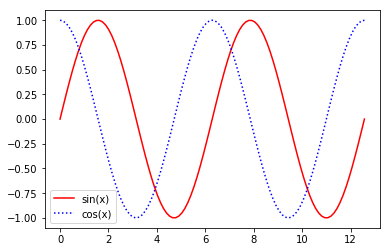

In [180]:
x = np.r_[0:(4*np.pi):101j] # np.linspace(0, (4*np.pi), 101)
plt.plot(x, np.sin(x), "r-", label="sin(x)")
plt.plot(x, np.cos(x), "b:", label="cos(x)")
plt.legend()
plt.show()

# Array Indexing

## vector indexing

* pure python list indexing
    * x = [1,2,3,4]
    * x[0]  -> scalar indexing is extractin
    * x[::-1] -> slice indexing for subsetting. Returns a view on an existing array


In [182]:
x = [1,2,3,5]

In [184]:
x[::-1]

[5, 3, 2, 1]

In [186]:
x = np.r_[1,2,4,5,6]
x

array([1, 2, 4, 5, 6])

In [188]:
x[0]

1

In [190]:
x[:1] # always results in an array


array([1])

In [191]:
x[::-1]

array([6, 5, 4, 2, 1])

* scalar based indexing
* slice based indexing
* int vector based 
* boolean vector based

In [193]:
x[[1,0,1,3]]

array([2, 1, 2, 5])

In [195]:
x[[0]] #always an array

array([1])

In [198]:
x[x>2]

array([4, 5, 6])

In [200]:
x[(x>2) & (x<5)]

array([4])

In [203]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [209]:
iris.sepal_length[(iris.species=="setosa") & (iris.sepal_length > 0.4)]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

 ## Exercise
 
 
* Print all values in $[-2,-1]\cup[1,2]$.
* Print the number and the proportion of nonnegative elements in `x`.
* Compute the arithmetic mean of absolute values.
* Determine elements in `x` which are the least and the most distant from 0.
* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.
* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.
* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]>=0` and `"negative"` otherwise.
* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]<-1`, `"large"` if `x[i]>1` and `"medium"` otherwise.

In [210]:
np.random.seed(6)
x = np.round(np.random.normal(size=20),2)
x

array([-0.31,  0.73,  0.22, -0.9 , -2.49,  0.91,  1.13, -1.51,  1.64,
       -0.43,  2.63,  0.6 , -0.34,  1.24,  0.11,  0.13,  0.08, -0.16,
        0.63,  0.81])

In [298]:
x[( (x >= -2.0) & (x <= -1.0) ) | ((x >= 1.0) & (x<=2.0))]

array([ 1.13, -1.51,  1.64,  1.24])

In [215]:
print(np.sum(x>=0))
print(np.mean(x>=0))

13
0.65


In [216]:
np.mean(np.abs(x))

0.85

In [306]:
print(x[np.abs(x) == np.min(np.abs(x))]) # least distant from 0
print(x[np.abs(x) == np.max(np.abs(x))]) # max distant from 0
print(x[np.argsort(np.abs(x-0.0))][[0,-1]]) # least and max distant from 0
print(x[[np.argmin(np.abs(x)),np.argmax(np.abs(x))]]) # least and max distant from 0

[0.08]
[2.63]
[0.08 2.63]
[0.08 2.63]


In [276]:
sorted_indexes = np.argsort(np.abs(x - np.mean(x))) #Determine 3 elements in x which are the most distant from the arithmetic mean of x.
print(sorted_indexes)
x[sorted_indexes[-3:]]



[ 2 15 14 16 11 18 17  1  0 19 12  9  5  6 13  3  8  7 10  4]


array([-1.51,  2.63, -2.49])

[-0.31  0.73  0.22 -0.9  -2.49  0.91  1.13 -1.51  1.64 -0.43  2.63  0.6
 -0.34  1.24  0.11  0.13  0.08 -0.16  0.63  0.81]
[-0.31  0.73  0.22 -0.9   0.91  1.13 -1.51  1.64 -0.43  0.6  -0.34  1.24
  0.11  0.13  0.08 -0.16  0.63  0.81]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a188cf390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a188cfc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a188cf240>],
 'medians': [<matplotlib.lines.Line2D at 0x1a188d94e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a188d9908>],
 'means': []}

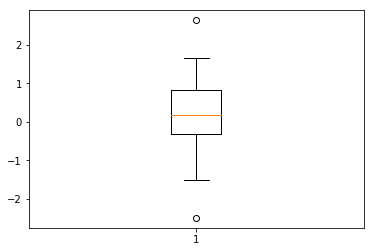

In [311]:
#Create a vector x2, which is a version of x with all outliers removed
(q1,q2,q3) = np.percentile(x,[25,50,75])
iqr = q3-q1
non_outliers = x[(x >= (q1-1.5*iqr)) & (x <= (q3+1.5*iqr))]
print(x)
print(non_outliers)
plt.boxplot(x) # 2 outliers


In [292]:
#Create a vector y such that y[i] is equal to "nonnegative" if the corresponding x[i]>=0 and "negative" otherwise.

[ "nonnegative" if i >= 0 else "negative" for i in x]

['negative',
 'nonnegative',
 'nonnegative',
 'negative',
 'negative',
 'nonnegative',
 'nonnegative',
 'negative',
 'nonnegative',
 'negative',
 'nonnegative',
 'nonnegative',
 'negative',
 'nonnegative',
 'nonnegative',
 'nonnegative',
 'nonnegative',
 'negative',
 'nonnegative',
 'nonnegative']

In [312]:
#without using for loop or list comprehension

np.where(x>0, "nonnegative", "negative")

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [315]:
#Create a vector y such that y[i] is equal to "small" if the corresponding x[i]<-1, "large" if x[i]>1 and "medium" otherwise.

np.where(x>1, "large", np.where(x < -1, "small", "medium"))

array(['medium', 'medium', 'medium', 'medium', 'small', 'medium', 'large',
       'small', 'large', 'medium', 'large', 'medium', 'medium', 'large',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium'],
      dtype='<U6')

In [319]:
y = np.repeat("non negative", len(x))
y[x<0] = "negative"
y


array(['negative', 'non negative', 'non negative', 'negative', 'negative',
       'non negative', 'non negative', 'negative', 'non negative',
       'negative', 'non negative', 'non negative', 'negative',
       'non negative', 'non negative', 'non negative', 'non negative',
       'negative', 'non negative', 'non negative'], dtype='<U12')

In [324]:
print((x >= 0).astype(np.int)) # encode it to 0 or 1

np.array(["negative", "nonnegative"])[ (x >= 0).astype(np.int)]

[0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1]


array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [326]:
# categorical data

x = np.r_[0,1,2,1,1,1,2,1,0,1]
l = np.array(["small","med", "large"])
l[x]

array(['small', 'med', 'large', 'med', 'med', 'med', 'large', 'med',
       'small', 'med'], dtype='<U5')

In [332]:
# Only slice based indexing returns a view on an existing array

x = np.r_[0,1,2,1,1,1,2,1,0,1]
slice = x[2:4]
print(slice)
slice[0] = 9999 # Also changes x
print(slice) 
print(x)

[2 1]
[9999    1]
[   0    1 9999    1    1    1    2    1    0    1]


In [335]:
x.ctypes.data, x.strides

(140720403779840, (8,))

In [340]:
x2 = x[ [0,1,2]] # Allocates another mem location - copy
x2.ctypes.data, x2.strides
x2[0] =888
print(x)
print(x2)

[   0    1 9999    1    1    1    2    1    0    1]
[ 888    1 9999]


In [342]:
x2 = x[ 0:2] 
x2.ctypes.data, x2.strides

(140720403779840, (8,))

In [345]:
x2 = x[ ::2] 
print(x2.ctypes.data, x2.strides)
print(x2)

x2 = x[ 2::2] 
print(x2.ctypes.data, x2.strides)
print(x2)

140720403779840 (16,)
[   0 9999    1    2    0]
140720403779856 (16,)
[9999    1    2    0]


# Matrix Indexing


In [349]:
A = np.r_[1:13].reshape(3,4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [354]:
#A[i,j] == A[(i,j)]


array([False, False,  True, False])

i\j    | scalar | slice | intvect | boolvec |
---------------------------------------------|
scalar | sclar   |  vector (V)     |   vector      |    vector     |
slice  |   x     |   matrix(V)    |    matrix     |    matrix     |
intvec |   x     |  x    |vectorized| vectorized|
boolvec| x | x |x |vectorized|

V === View on an existing array

In [356]:
A[0,1]

2

In [358]:
A[-1,0]

9

In [360]:
A[-1,::-1]

array([12, 11, 10,  9])

In [362]:
A[:,-1] # all rows last col

array([ 4,  8, 12])

In [364]:
A[-1, [0,1,0]]

array([ 9, 10,  9])

In [368]:
A[np.r_[True, False, True ], -1]

array([ 4, 12])

In [370]:
A[:, A.mean(axis=0) > 5]

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

In [374]:
A[::2,::-1] # this is a view 

array([[ 4,  3,  2,  1],
       [12, 11, 10,  9]])

In [375]:
A[:,:2]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [379]:
A[::2,[0,1,0]] # From:To:Step

array([[ 1,  2,  1],
       [ 9, 10,  9]])

In [380]:
A[:2,A.mean(axis=0) > 5] # every second row with column mean greater than 5

array([[2, 3, 4],
       [6, 7, 8]])

In [383]:
A[np.r_[0,1,2],np.r_[0,1,2]] # only the diagonals

array([ 1,  6, 11])

In [385]:
A[np.r_[0,1,2],np.r_[0,1,2,8]] # ERROR - 

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (4,) 

In [387]:
A[np.r_[0,1,2].reshape(-1,1),np.r_[0,2].reshape(1,-1)] # pick 0th and 2nd Col 

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [389]:
A[np.ix_(np.r_[0,1,2], np.r_[0,2])] # same as above

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])